## Linear Regression with PyTorch

- Allows us to understand relationship between two continous variables
- Example:
    x: Independent Variable
      - weight
    y: dependent Variable
      - height
- y = mx + c

In [2]:
import numpy as np
import matplotlib.pyplot as plt

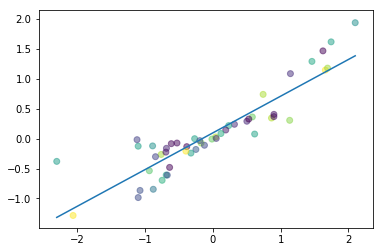

In [3]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.rand(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### Aim:
- Minimize distance between points and line ( y = mx + c)
- Adjusting
    1. Coefficient/Slope: m
    2. Bias/Intercept: c

## Example

Assuming the relation/equation we are looking for is ``y = 2x + 1``
- So here
    - Coefficient/slope = 2
    - Bias/Intercept = 1

In [4]:
#Toy data
x_values = [ i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
#convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [6]:
# 2D Required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

Equation: y = 2x + 1

In [7]:
y_values = [ 2*i + 1 for i in x_values ]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [8]:
#If you are weak in list iterators..
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result)
    
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [9]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [10]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### Lets Build Model 

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable

#### Model
1. Linear model
    - True equation: y = 2x + 1
2. Forward
    - Example
        - Input x = 1
        - Output y' = ?

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        #here input_dim= x, output_dim= y
        
    def forward(self, x):
        out = self.linear(x)
        return out

#### Instantiate Model
 - Input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 - Desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [13]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

#### Instantiate Loss Class
- MSE Loss: Mean Squared Error
-\begin{equation*}
 MSE = 1/n \sum_{i=1}^n (y'_i - y_i)
\end{equation*}
    - y' : prediction
    - y : true value
    


In [14]:
criterion = nn.MSELoss()

#### Instantiate Optimizer Class
- Simplified equation
    - \begin{equation*}
       \theta = \theta - \eta . \nabla_\theta
       \end{equation*}
        - θ : parameters (our variables)
        - η : Learning rate
        - \begin{align}
        \nabla_\theta : \text{Parameters gradients}
          \end{align}
          
- Even Simpler equation
    - ``parameters = parameters - learning_rate * parameters_gradients``
        - parameters: m and c in y = mx + c
        - desired parameters: m = 2 and x = 1 in y = 2x + 1

In [15]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Train Model

- 1 epoch: going through whole x_train data once
     - 100 epochs: 
         - 100x mapping x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- Process
    1. Convert inputs/labels to variables
    2. Clear gradient buffers
    3. Get output, given inputs
    4. Get loss
    5. Get gradients wrt params.
    6. Update params using gradients
        - ``parameters = parameters - learning_rate * parameters_gradients``
    7. Repeat

In [16]:
epochs = 100

for epoch in range(epochs):
    epoch += 1
    
    #Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #Clear gradient wrt params
    optimizer.zero_grad()
    
    #forward pass to get output
    outputs = model(inputs)
    
    #calculate loss
    loss = criterion(outputs, labels)
    
    #Get gradients wrt params
    loss.backward()
    
    #update params
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 117.58783721923828
epoch 2, loss 9.804895401000977
epoch 3, loss 1.0109996795654297
epoch 4, loss 0.29135027527809143
epoch 5, loss 0.2303183227777481
epoch 6, loss 0.22303366661071777
epoch 7, loss 0.22015859186649323
epoch 8, loss 0.21766872704029083
epoch 9, loss 0.21523556113243103
epoch 10, loss 0.2128317952156067
epoch 11, loss 0.21045516431331635
epoch 12, loss 0.20810498297214508
epoch 13, loss 0.20578111708164215
epoch 14, loss 0.2034831941127777
epoch 15, loss 0.20121091604232788
epoch 16, loss 0.19896413385868073
epoch 17, loss 0.19674238562583923
epoch 18, loss 0.19454528391361237
epoch 19, loss 0.19237279891967773
epoch 20, loss 0.19022464752197266
epoch 21, loss 0.1881004273891449
epoch 22, loss 0.18599995970726013
epoch 23, loss 0.1839229017496109
epoch 24, loss 0.1818690150976181
epoch 25, loss 0.179838165640831
epoch 26, loss 0.17782999575138092
epoch 27, loss 0.17584411799907684
epoch 28, loss 0.17388050258159637
epoch 29, loss 0.17193876206874847
epoch 

### Compare Results


In [17]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  0.48225662],
       [  2.55681634],
       [  4.63137579],
       [  6.70593548],
       [  8.78049564],
       [ 10.85505486],
       [ 12.92961502],
       [ 15.00417423],
       [ 17.07873344],
       [ 19.15329361],
       [ 21.22785378]], dtype=float32)

In [40]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

### Visualize

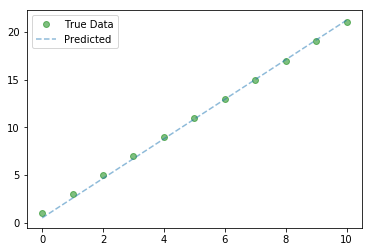

In [18]:
plt.clf()

plt.plot(x_train, y_train, 'go', label='True Data', alpha = 0.5)

plt.plot(x_train, predicted, '--', label='Predicted', alpha = 0.5)

plt.legend(loc='best')
plt.show()

In [46]:
### Save model
save_model = False
if save_model is True:
    #saves only params
    torch.save(model.state_dict(), 'linear_model.pk1')

In [47]:
###Load model

In [49]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('linear_model.pk1'))